In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob


from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

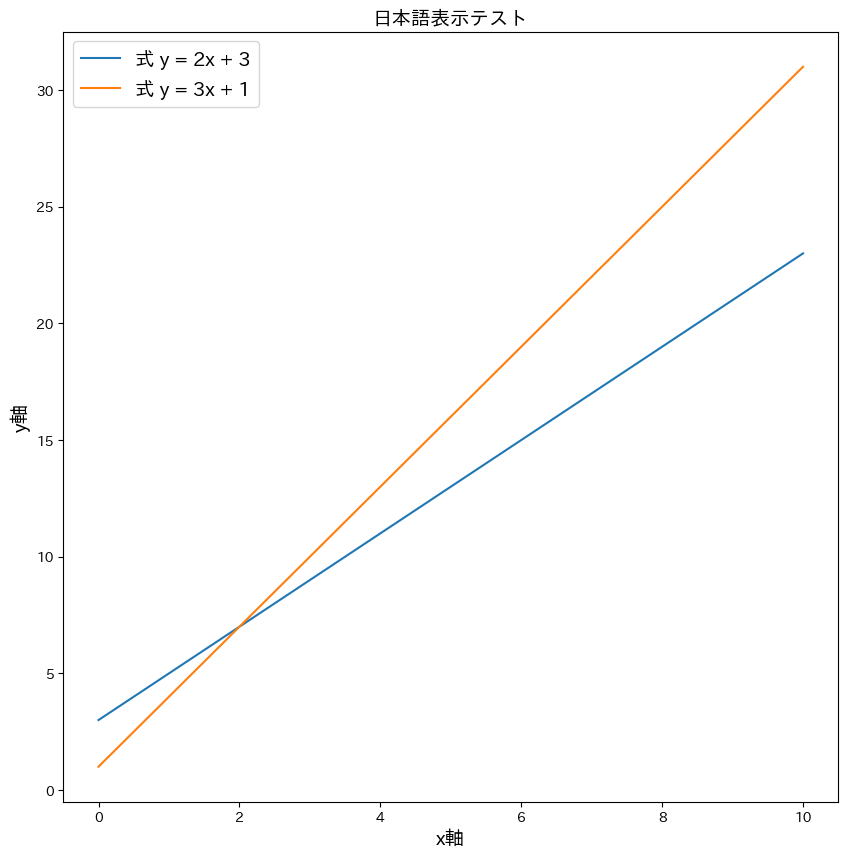

In [4]:


plt.figure(figsize=(10,10))
# データ準備
x = np.linspace(0, 10, 5)     # 横軸の描画範囲指定
y1 = 2 * x + 3    # 式1 y = 2x + 3より、縦軸の値算出
y2 = 3 * x + 1    # 式2 y = 3x + 1より、縦軸の値算出

# グラフの装飾
plt.title('日本語表示テスト', fontsize=14) # タイトル
plt.xlabel("x軸", fontsize=14) # x軸ラベル
plt.ylabel("y軸", fontsize=14) # y軸ラベル
# plt.set_box_aspect((1,1,1))
# グラフの描画
plt.plot(x, y1, label="式 y = 2x + 3")   # 式1の描画
plt.plot(x, y2, label="式 y = 3x + 1")   # 式2の描画
plt.legend(loc="upper left", fontsize=14) # 凡例表示
plt.show()

In [7]:

files = glob.glob('../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

In [8]:
def Add_reneable_error_to_King(df_king):

    # 北電の数値だけ、nanを0で置き換える(一年分しかないため)
    df_king['北電太陽光想定(MW)'] = df_king['北電太陽光想定(MW)'].fillna(0)
    df_king['北電太陽光実績(MW)'] = df_king['北電太陽光実績(MW)'].fillna(0)
    df_king['北電風力想定(MW)'] = df_king['北電風力想定(MW)'].fillna(0)
    df_king['北電風力実績(MW)'] = df_king['北電風力実績(MW)'].fillna(0)
    # 想定値・実績地の合算
    name_list=['太陽光想定','太陽光実績','風力想定','風力実績']
    for i in range(len(name_list)):
        df_king[f'{name_list[i]}合計(MW)'] = df_king[f'北電{name_list[i]}(MW)'] + df_king[f'九電{name_list[i]}(kWh)']/2/1000 + df_king[f'東電{name_list[i]}(kWh)']/2/1000 + df_king[f'関電{name_list[i]}(kWh)']/2/1000 + df_king[f'中国{name_list[i]}(kWh)']/2/1000 

    # 誤差合計　実績ー想定
    df_king['太陽光発電誤差(MW)(実績-想定)'] = df_king['太陽光実績合計(MW)'] - df_king['太陽光想定合計(MW)']
    df_king['風力発電誤差(MW)(実績-想定)'] = df_king['風力実績合計(MW)'] - df_king['風力想定合計(MW)']

    df_king['再エネ発電誤差(MW)(実績-想定)'] = df_king['太陽光発電誤差(MW)(実績-想定)'] + df_king['風力発電誤差(MW)(実績-想定)']
    return(df_king)

def Add_ave_yobiritsu_to_King(df_king):
    name_list = ['北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)','北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)']
    ave_yobiritsu_data = df_king[f'{name_list[0]}'].values
    for name in name_list[1:]:
        ave_yobiritsu_data = ave_yobiritsu_data + df_king[f'{name}'].values
        
    df_king['平均広域予備率(%)'] = ave_yobiritsu_data/len(name_list)
    return(df_king)

In [9]:
df_king = Add_reneable_error_to_King(df_king)
df_king = Add_ave_yobiritsu_to_King(df_king)

In [10]:
df_select_yobiritsu_renewable = df_king.dropna()
# df_select_yobiritsu_renewable.to_csv('../../卒論関連書類/データ/抽出＿分析データ/再エネ誤差_予備率_価格差/再エネ誤差_予備率_価格差1.csv')

In [ ]:
df_select_yobiritsu_renewable

In [ ]:
df_select_yobiritsu_renewable

In [ ]:
import matplotlib.cm as cm #カラーマップ
import matplotlib.pyplot as pyplot
import mpl_toolkits.mplot3d
%matplotlib inline

X = np.linspace(5,10,10)
Y = np.linspace(0,20,10)
Z = np.linspace(-20,20,10)

figure = pyplot.figure(figsize=([100,100]), facecolor='w')
ax = figure.add_subplot(projection='3d')
xlabel = ax.set_xlabel("X-axis [N]", fontsize = 18) ##fontsize追加
ylabel = ax.set_ylabel("Z-axis [N]", fontsize = 18) ##fontsize追加
zlabel = ax.set_zlabel("Y-axis [N]", fontsize = 18) ##fontsize追加
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(-20,20)
for i in range(len(X)):
    ax.tick_params(labelsize = 13)##tick_params追加
    ax.plot([0,X[i]], [0,Y[i]], [0,Z[i]], "-^", color=cm.winter(200-(i+1)*20), ms=7, mew=0.5, lw=3)
    
    #3D空間上で原点が見にくいので，原点描画用
    ax.plot([-21,21], [0,0], [0,0], "-", color="gray", lw=1, linestyle = 'dotted')
    ax.plot([0,0], [-21,21], [0,0], "-", color="gray", lw=1, linestyle = 'dotted')
    ax.plot([0,0], [0,0], [-21,21], "-", color="gray", lw=1, linestyle = 'dotted')
    
    #3Dグラフの視点の変更
    ax.view_init(30, 30)
# plt.savefig("output2.jpg")

In [ ]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,2,1))
plt.title("二乗値のグラフ", fontname="MS Gothic")
plt.show()

In [17]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(MW)', '北電風力想定(MW)', '北電太陽光実績(MW)',
       '北電風力実績(MW)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)',
       '太陽光想定合計(MW)', '太陽光実績合計(MW)', '風力想定合計(MW)', '風力実績合計(MW)',
       '太陽光発電誤差(MW)(実績-想定)', '風力発電誤差(MW)(実績-想定)', '再エネ発電誤差(MW)(実績-想定)',
       '平均広域予備率(%)'],
      dtype='object')

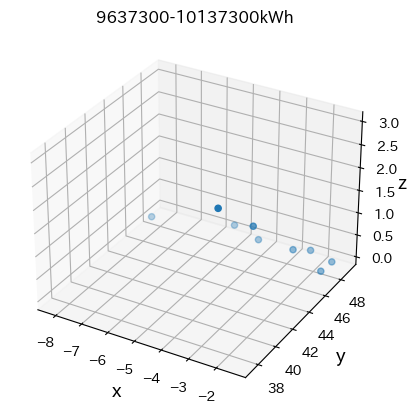

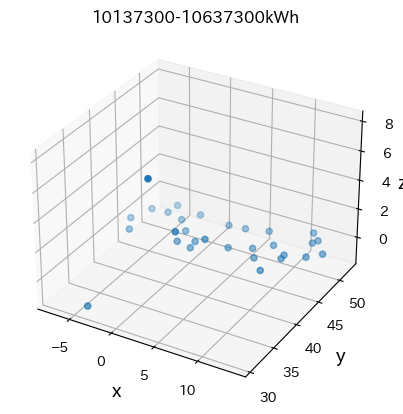

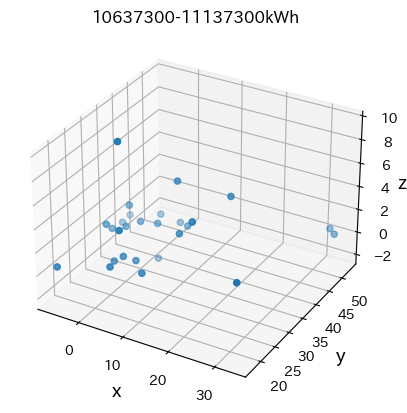

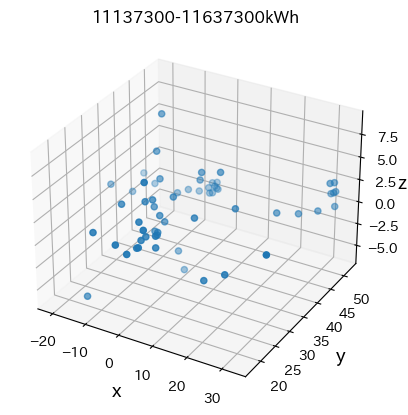

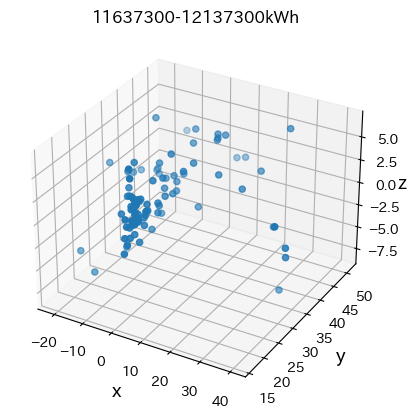

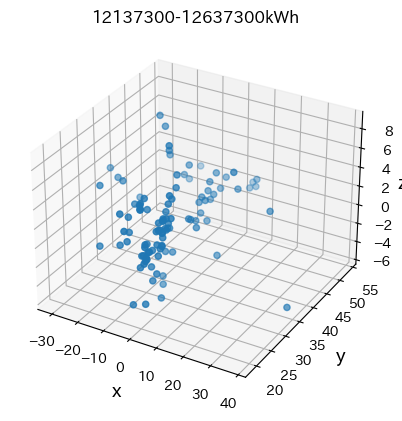

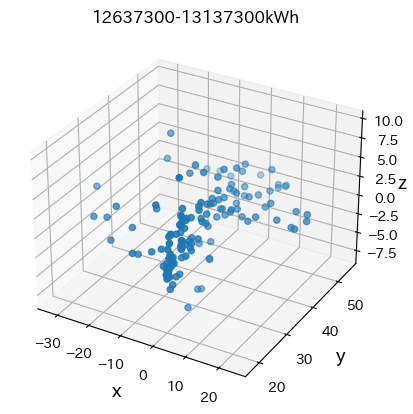

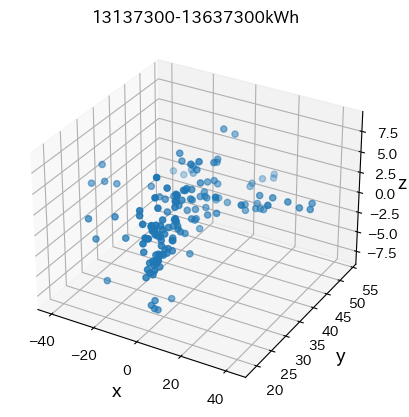

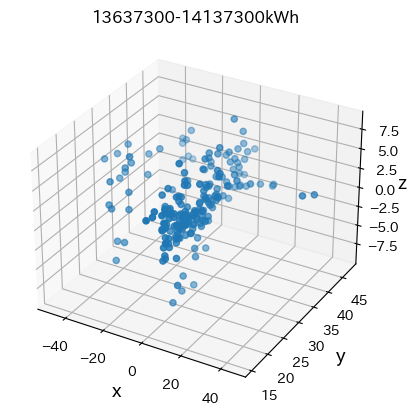

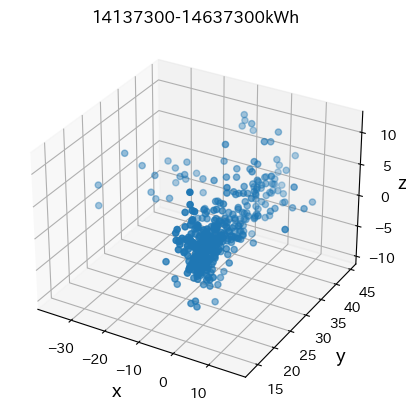

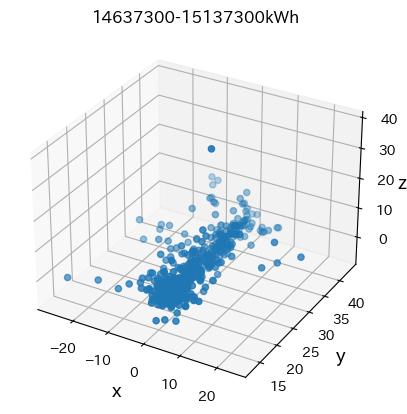

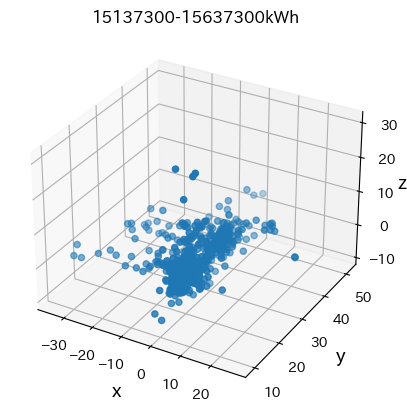

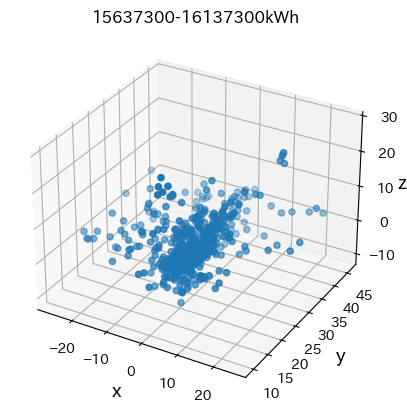

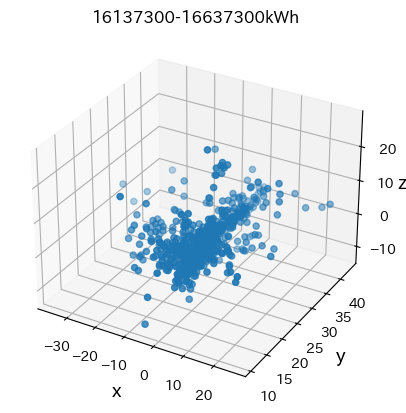

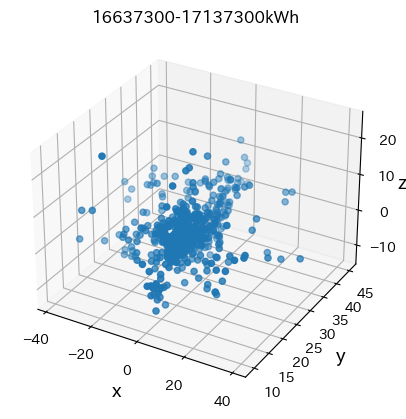

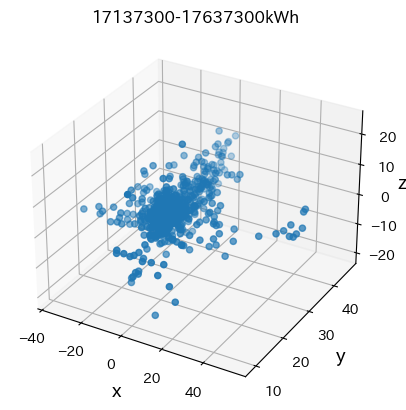

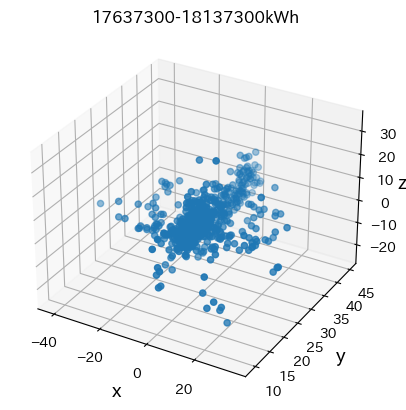

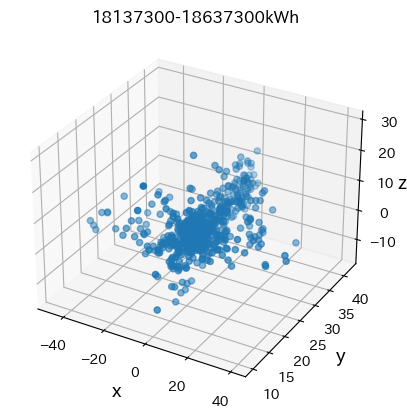

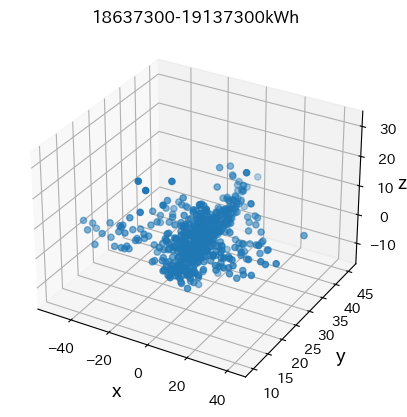

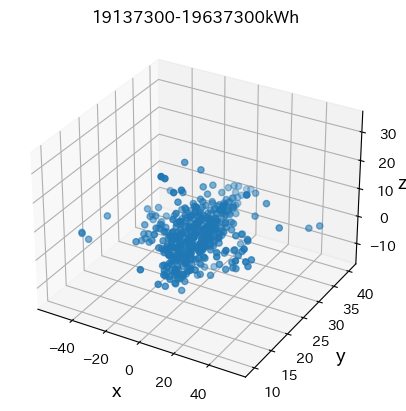

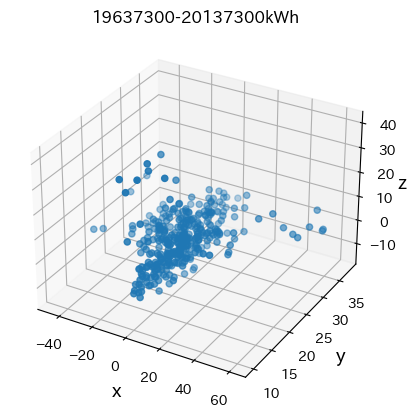

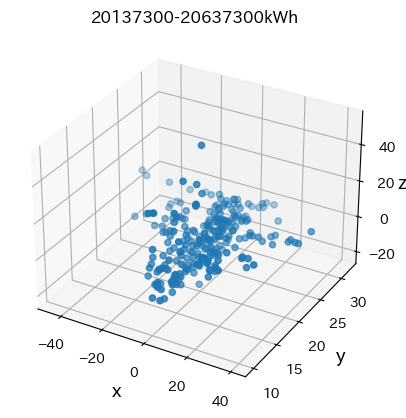

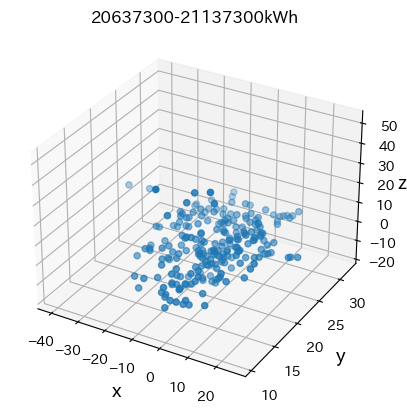

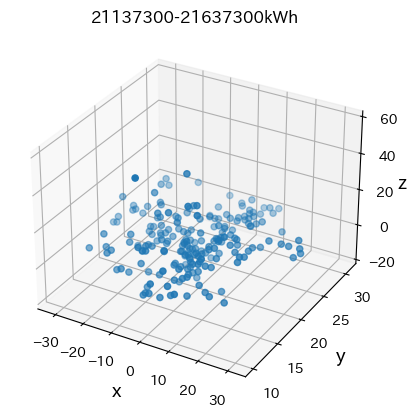

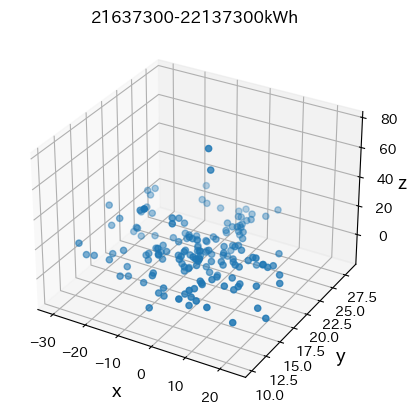

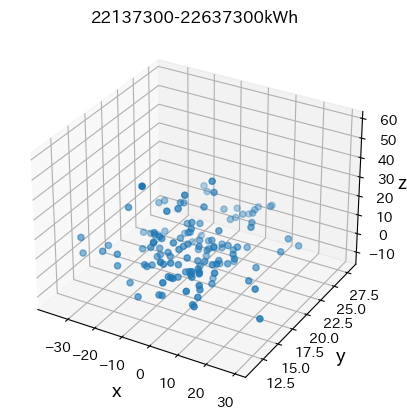

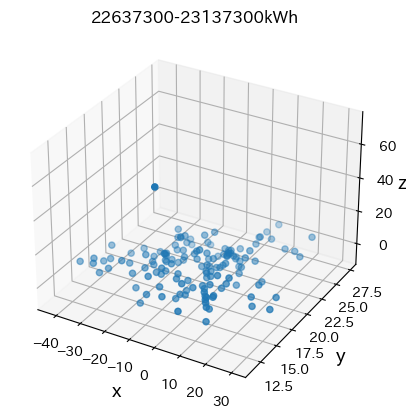

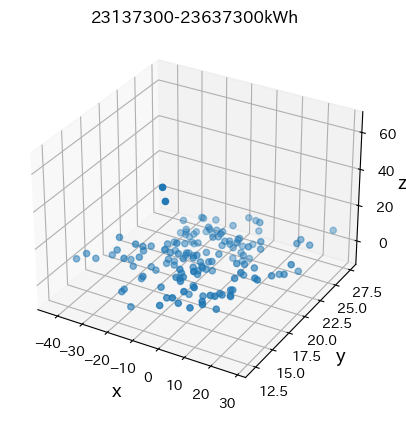

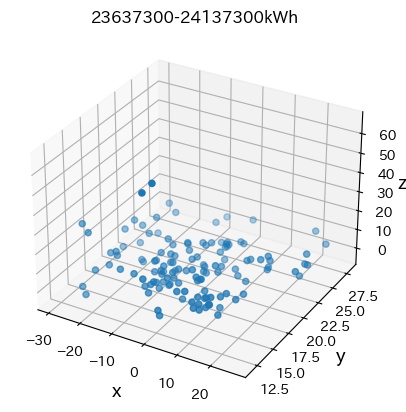

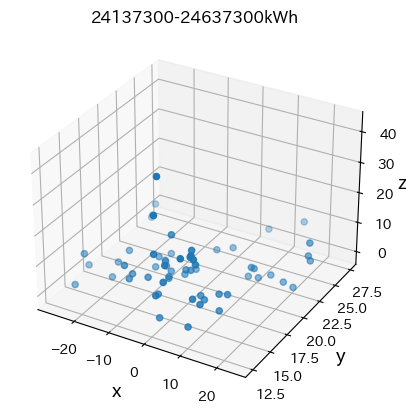

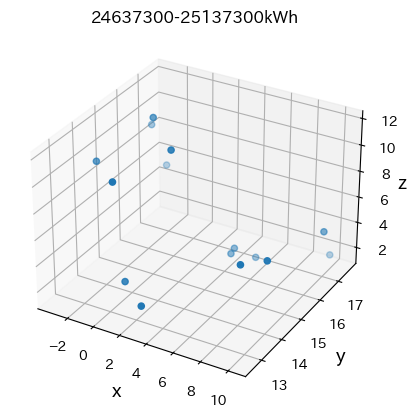

In [20]:
df_select_yobiritsu_renewable = pd.read_csv('../../卒論関連書類/データ/抽出＿分析データ/再エネ誤差_予備率_価格差/再エネ誤差_予備率_価格差1.csv')

# スポットの電力需要ごとに分ける。

volume_spot = df_select_yobiritsu_renewable['spot_volume(kWh)'].values
min_volume_spot =np.min(volume_spot)
max_volume_spot = np.max(volume_spot)
# 1000MWhずつのとき1000*1000
MWh_range = 500*1000*1
plot_num =int((max_volume_spot-min_volume_spot)/MWh_range)

for num in range(0,plot_num):
    start_point = min_volume_spot+MWh_range*num
    end_point=min_volume_spot+MWh_range*(num+1)

    df= df_select_yobiritsu_renewable[(df_select_yobiritsu_renewable['spot_volume(kWh)']>start_point) & (df_select_yobiritsu_renewable['spot_volume(kWh)']<end_point)]

    gap =df['gap_price[intra-spot](円/kWh)'].values
    renew_error = df['再エネ発電誤差(MW)(実績-想定)'].values/30 #30分の一縮尺
    yobiritsu_ave = df['平均広域予備率(%)'].values
    solar_error = df['太陽光発電誤差(MW)(実績-想定)'].values
    wind_error = df['風力発電誤差(MW)(実績-想定)'].values


    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)
    ax.set_zlabel("z", fontsize=14,labelpad=-2)
    ax.scatter(renew_error,yobiritsu_ave,gap)
    # ax.scatter(solar_error,wind_error,gap)
    plt.title(f'{start_point}-{end_point}kWh')
    plt.savefig(f'../../../../Desktop/share_images/三軸_予備率_再エネ/x再エネ_y予備率_z価格差{num}.png')

    # plt.savefig(f'../../../../Desktop/share_images/三軸_太陽光_風力/x太陽光_y風力_z価格差{num}.png')

    plt.show()

    # plt.scatter(renew_error,gap)
    # plt.xlabel('renew_error')
    # plt.ylabel('gap_price')
    # plt.title(f'{start_point}-{end_point}KWh')
    # plt.show()

In [ ]:
plt.scatter(renew_error,gap)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
x = [1, 1, 2, 2, 1, 1, 2, 2]
y = [1, 2, 1, 2, 1, 2, 1, 2]
z = [1, 1, 1, 1, 2, 2, 2, 2]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim3d(0, 3)
ax.set_ylim3d(0, 3)
ax.set_zlim3d(0, 3)
ax.scatter(x, y, z)
 
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.plot(x1,y)
plt.show()

In [ ]:
df_king.columns

In [ ]:
name_list = ['北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)','北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)']

In [ ]:
name_list = ['北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)','北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)']
ave_yobiritsu_data = df_king[f'{name_list[0]}'].values
for name in name_list[1:]:
    ave_yobiritsu_data = ave_yobiritsu_data + df_king[f'{name}'].values
    
df_king['平均広域予備率'] = ave_yobiritsu_data/len(name_list)

In [ ]:
ave_yobiritsu = df_king['平均広域予備率'].dropna().values

In [ ]:
np.min(ave_yobiritsu)

In [ ]:
df_king.dropna()

In [ ]:
ave_yobiritsu.dropna()

In [ ]:
df_king

In [ ]:
df_king['太陽光想定合計(MW)'] = df_king['北電太陽光想定(MW)'] + df_king['九電太陽想定値(kWh)']/2/1000 + df_king['東電太陽光想定(kWh)']/2/1000 + df_king['関電太陽光想定(kWh)']/2/1000 + df_king['中国太陽光想定(kWh)']/2/1000 


In [ ]:
df_king['北電太陽光想定(MW)'] = df_king['北電太陽光想定(MW)'].fillna(0)
df_king['北電太陽光実績(MW)'] = df_king['北電太陽光実績(MW)'].fillna(0)
df_king['北電風力想定(MW)'] = df_king['北電風力想定(MW)'].fillna(0)
df_king['北電風力実績(MW)'] = df_king['北電風力実績(MW)'].fillna(0)



In [ ]:
df_select_renewable = df_king.drop(columns=['北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)','北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)']).dropna()

In [ ]:
# 再エネ誤差と価格差がまとまった
df_select_renewable.to_csv('../../卒論関連書類/データ/抽出＿分析データ/再エネ誤差と価格差/select_renewable1.csv',index=False)

In [ ]:
df_king

In [ ]:
df_king.dropna()

In [ ]:
df =df_king['北電太陽光想定(MW)'] + df_king['九電太陽光想定(kWh)']/2/1000 

In [ ]:
df.dropna()

In [ ]:
df_king['九電太陽光想定(kWh)'].dropna()

In [ ]:
df_king['北電太陽光想定(MW)'].dropna()